# STROKE PREDICTION


[Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Stroke is the second leading cause of death worldwide according to the World Health Organization (WHO), responsible for approximately 11% of total deaths.

This dataset is utilized to predict the likelihood of a patient experiencing a stroke based on input parameters such as gender, age, various medical conditions, and smoking status. Each row in the data represents information from each patient's condition.

**Data Column Information**
1. id: unique identification
2. gender: "Male", "Female", or "Other"
3. age: patient's age
4. hypertension: 0 if the patient does not have a history of hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient does not have heart disease, 1 if the patient has heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_job", "Never_worked", "Private", or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes", or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in 'smoking_status' means information is not available for that patient

# Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# Data Loading


In [2]:
! mkdir ~/.kaggle
!cp '/content/kaggle.json' ~/.kaggle
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

cp: cannot stat '/content/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 33.7MB/s]


In [3]:
!unzip -q /content/loan-status-prediction.zip

unzip:  cannot find or open /content/loan-status-prediction.zip, /content/loan-status-prediction.zip.zip or /content/loan-status-prediction.zip.ZIP.


In [4]:
!unzip /content/stroke-prediction-dataset.zip

Archive:  /content/stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [5]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Terdapat missing value pada bmi

# EDA (Exploratory Data Analysis)

In [9]:
df.drop('id',inplace=True,axis=1)

In [10]:
print("Summary statistics:")
display(df.describe(include='number'))

Summary statistics:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
display(df.describe(include='object'))

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Perhatikan bahwa gender terdapat 3 jenis yang tidak realistis

In [12]:
print("Class distribution:")
display(df[['work_type','gender']].value_counts())

Class distribution:


work_type      gender
Private        Female    1754
               Male      1170
Self-employed  Female     504
Govt_job       Female     399
children       Male       361
               Female     326
Self-employed  Male       315
Govt_job       Male       258
Never_worked   Female      11
               Male        11
Private        Other        1
Name: count, dtype: int64

It appears that the 'other' gender class is unrealistic. Therefore, the 'other' class will be dropped.

In [13]:
df.drop(df[df['gender']== 'Other'].index, inplace=True)

## Handling Missing Values

In [14]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

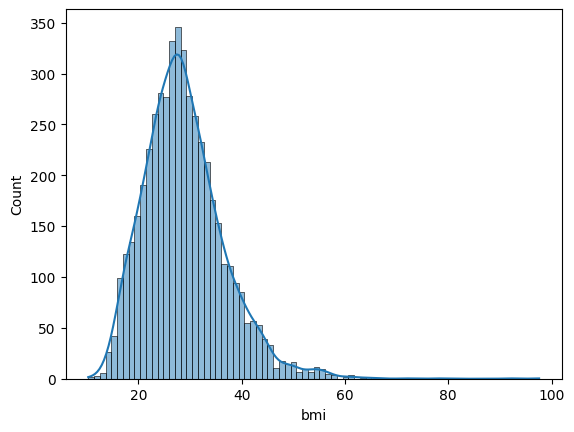

In [15]:
# Checking the distribution of BMI for determining BMI fillna strategy
sns.histplot(data = df, x='bmi',kde=True);
plt.show()

Since BMI is normally distributed, we will perform BMI fillna with the mean.

In [16]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [17]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Data is clean


## Plotting each column in the dataset

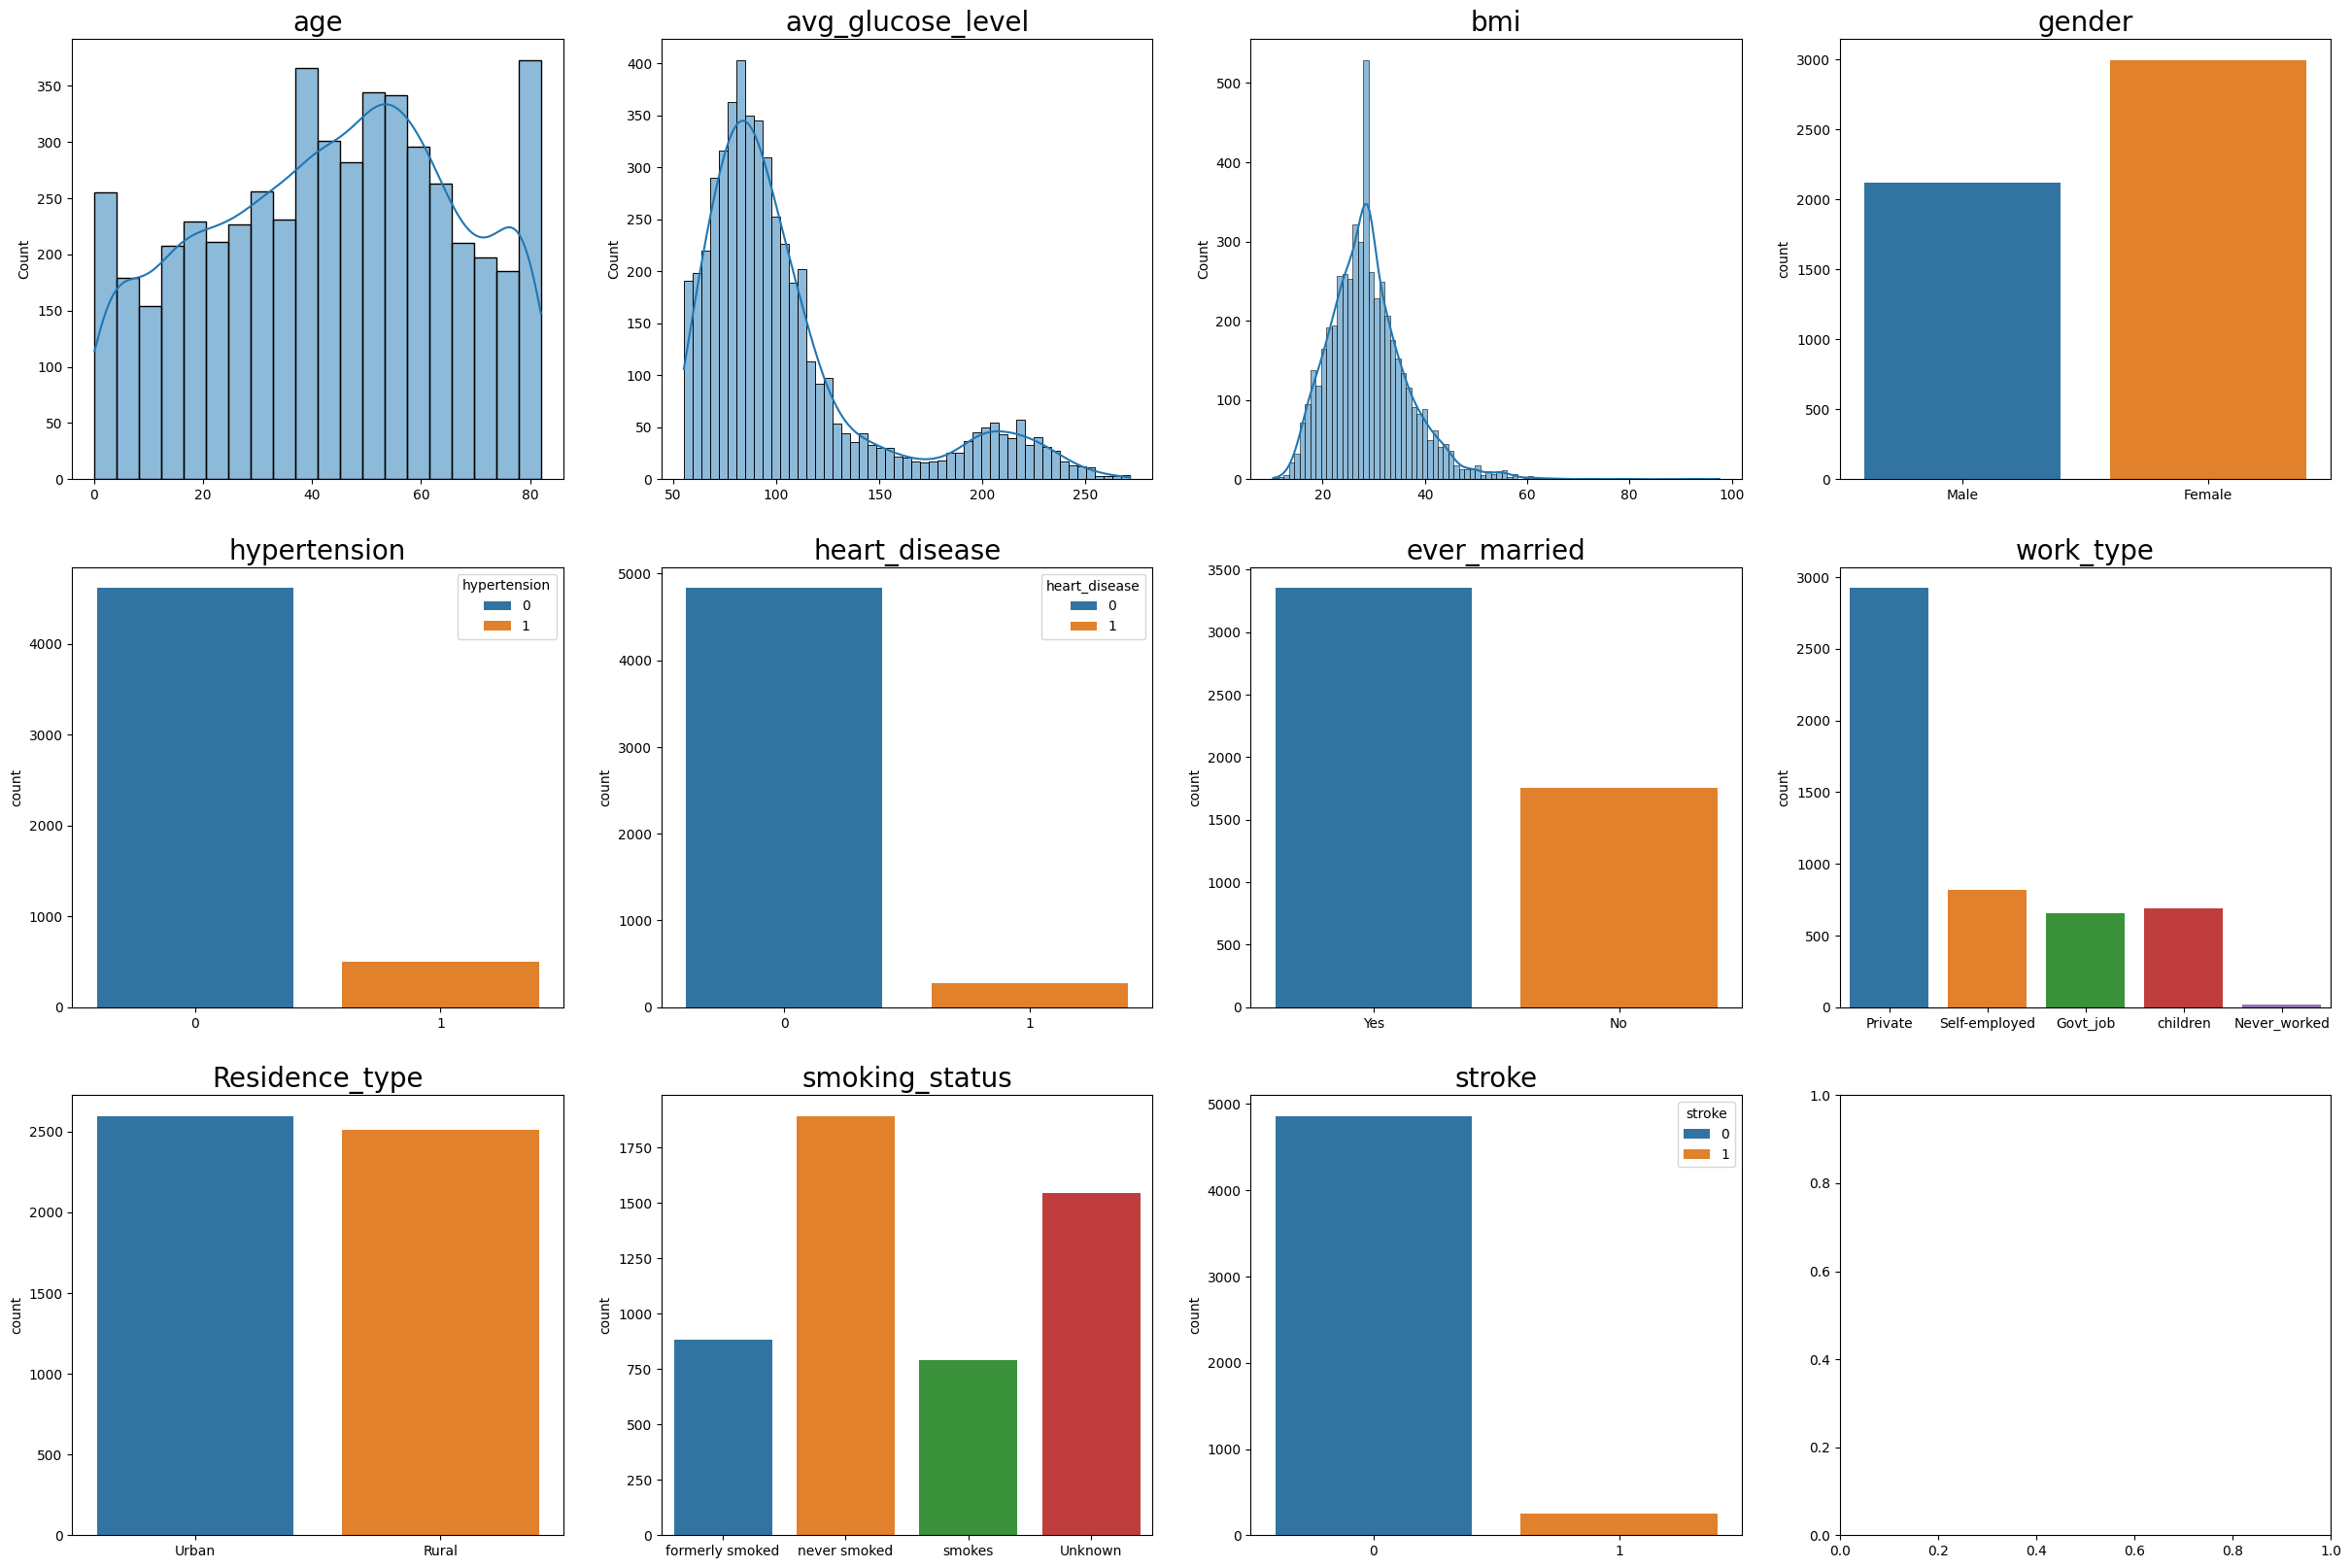

In [18]:
# Plotting each column in the dataset
fig, ax = plt.subplots(3, 4)
fig.set_size_inches(30, 20)

features = ['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease',
            'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']
numerical_features = ['age', 'avg_glucose_level', 'bmi']

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    if feature in numerical_features:
        hist = sns.histplot(data=df, x=feature, ax=ax[row, col], kde=True)
    else:
        hist = sns.countplot(data=df, x=feature, ax=ax[row, col], hue=feature)
    hist.set_title(feature, fontsize=20)
    hist.set_xlabel('')

plt.show()

1. **Age**: We couldn't gain deeper insights just by looking at the graph. Therefore, we will explore the age vs sex graph with positive stroke.

2. **Average Glucose Level**: The graph exhibits positive skewness, indicating that most individuals have lower-than-average blood glucose levels, but there are also a small number of individuals with very high blood glucose levels, causing the distribution tail to curve to the right.

3. **BMI**: It seems that BMI is normally distributed. However, due to the imputation of missing values with the mean, there are bars that appear to exceed the peak of the distribution line.

4. **Gender**: It is found that there are more female data than male data.

5. **Hypertension, Heart Disease, Stroke**:
   - From the three graphs, it is observed that there is class imbalance which needs to be addressed by oversampling before modeling.
   - It can be seen that all three have similar graph shapes, suggesting a strong correlation between them.

6. **Work Type**: It is found that the majority of individuals work in the private sector, followed by self-employed and government jobs, while others are categorized as children or those who have never worked.

7. **Residence Type**: From the graph, it is found that the housing data is almost balanced between urban and rural areas.

8. **Smoking Status**: It is obtained that individuals who never smoked have the highest data count and have a significant difference compared to smokers and former smokers, which may be influenced by the presence of 'Unknown' data ranking second highest in the graph.

## Number of Stroke Cases Based on Marital Status

Text(0.5, 1.0, 'Number of Stroke Cases Based on Marital Status')

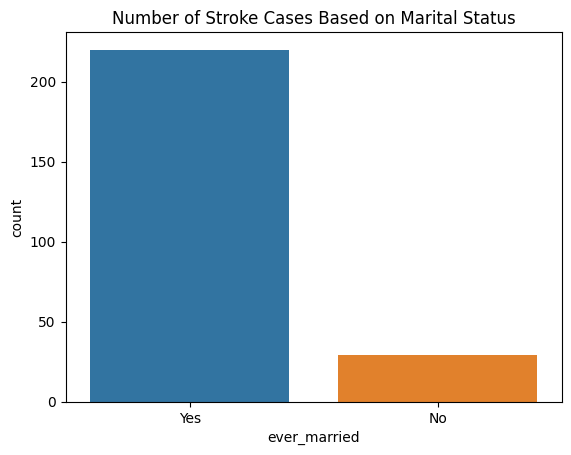

In [19]:
strok=df[df['stroke']==1]
sns.countplot(data=strok, x='ever_married', hue='ever_married')
plt.title('Number of Stroke Cases Based on Marital Status')

Based on the visualization, we can observe that the risk of stroke in the unmarried category is lower compared to married individuals.

## Number of Stroke Cases Based on Gender

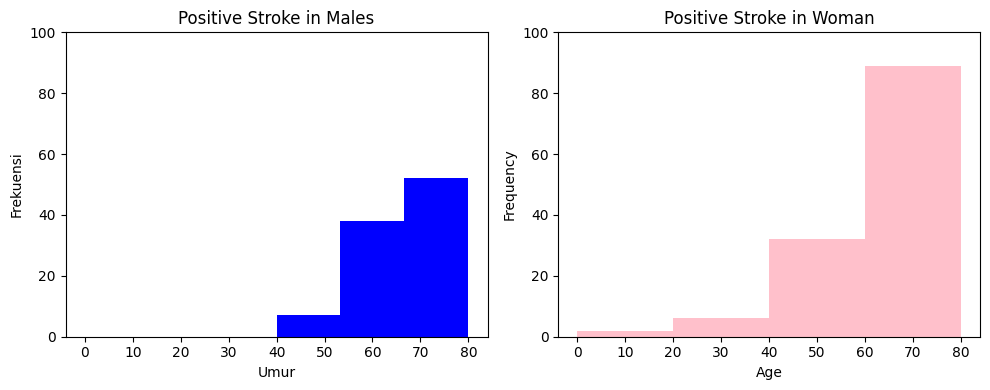

In [20]:
# Filtering the data for males and females who experienced a positive stroke.
men_positive = df[(df['stroke'] == 1) & (df['gender'] == 'Male')]
women_positive = df[(df['stroke'] == 1) & (df['gender'] == 'Female')]

# Plotting
plt.figure(figsize=(10, 4))

# histogram plot for men
plt.subplot(1, 2, 1)
plt.hist(men_positive['age'], bins=np.linspace(0, 80, 7), color='blue')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.title('Positive Stroke in Males')
plt.ylim(0, 100)

# histogram plot for women
plt.subplot(1, 2, 2)
plt.hist(women_positive['age'], bins=np.linspace(0, 80, 5), color='pink')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Positive Stroke in Woman')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

It was found that males become vulnerable to stroke starting from the age of 40-60, while females are more susceptible to stroke than males in the same age range.

In [21]:
# Calculating the number of strokes (value 1) in the 'stroke' column.
number_of_strokes = df['stroke'].value_counts()[1]

# Calculating total row of dataframe
total_data = df.shape[0]

# Calculating stroke precentation
stroke_percentage = (number_of_strokes / total_data) * 100

print("Percentation of stroke patient: {:.2f}%".format(stroke_percentage))


Percentation of stroke patient: 4.87%


In [22]:
total_data

5109

<Axes: >

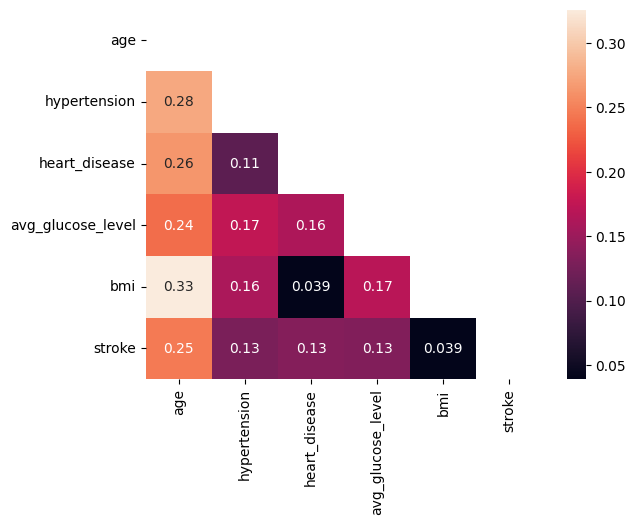

In [23]:
# Correlation among numerical data
numerical_df = df.select_dtypes(exclude = 'object')
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, mask = np.triu(np.ones_like(corr, dtype=bool)))


Based on the hypertension, heart_diseases, and stroke graphs, it is evident that there is class imbalance, further highlighted by the stroke data (1) percentage of 4.87%. This imbalance can have a negative impact on ML modeling later on. Therefore, **oversampling** will be conducted to address this issue.

**Explanation**:
Class imbalance refers to a situation where the classes in the dataset are not represented equally. In this case, there are significantly fewer instances of stroke (class 1) compared to non-stroke cases (class 0). This can lead to biased model performance, where the model may perform well on the majority class but poorly on the minority class. Oversampling is a technique used to mitigate class imbalance by artificially increasing the number of instances in the minority class, thus providing more balanced training data for the model to learn from.

# Data Preprocessing

1. Oversampling will be conducted using the SMOTENC method because it can preserve the values in categorical columns represented by 0 and 1.

2. Train_test_split will be performed before oversampling to avoid testing the model using synthetic data generated by SMOTENC.

3. Data scaling will be carried out using MinMaxScaler because the data contains boolean columns with values of 0 and 1.

In [24]:
print(df.columns.get_loc('work_type'))

5


In [25]:
# Encoding Categorical Data with One-Hot Encoding
df_onehot = pd.get_dummies(df).astype(int)

In [26]:
df_onehot.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61,0,0,202,28,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80,0,1,105,32,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0


In [27]:
df_onehot.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [28]:
# Separate df_onehot to be X and y
X = df_onehot.drop(columns=['stroke'])  # Features
y = df_onehot['stroke']  # Target variable

# Split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8 , random_state = 123)

In [29]:
y_test.value_counts()

stroke
0    972
1     50
Name: count, dtype: int64

In [30]:
X_train.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [31]:
# To find columns in X_train that contain boolean values
cf = X_train.apply(lambda col: col.isin([0, 1]).all())

# Index of columns containing boolean data
cat_features_col=[]

for key, value in cf.items():
    if value:
      cat_features_col.append(X_train.columns.get_loc(str(key)))

cat_features_col

[1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [32]:
from imblearn.over_sampling import SMOTENC

# SMOTENC
smotenc = SMOTENC(categorical_features= cat_features_col, k_neighbors = 5, random_state = 456)

# Oversampling on X_train and y_train
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train, y_train)


In [33]:
y_train_balanced.value_counts()

stroke
0    3888
1    3888
Name: count, dtype: int64

# Modeling (Base Model)

Default Parameters

- Decision Tree
- Random Forest

## Decision Tree

In [34]:
# Decision Tree train
dt = DecisionTreeClassifier(random_state=78)
dt.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier(random_state=78)

In [35]:
print("Default Parameters for Decision Tree:")
print(dt.get_params())

Default Parameters for Decision Tree:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 78, 'splitter': 'best'}


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.14      0.26      0.18        50

    accuracy                           0.88      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.92      0.88      0.90      1022



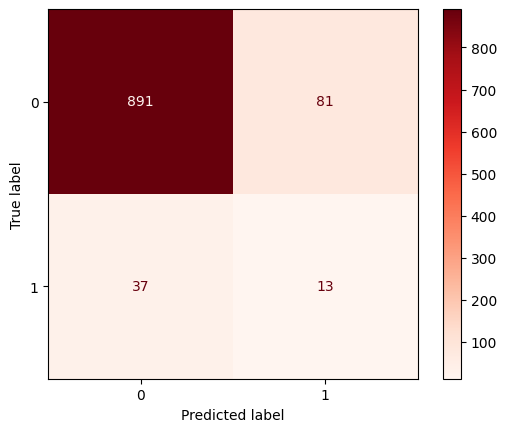

In [36]:
# Model Prediction

y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap = 'Reds'))

## Random Forest

In [37]:
# Random Forest train
rf = RandomForestClassifier(random_state=29)
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=29)

In [38]:
rf_base_params = rf.get_params()
for key, value in rf_base_params.items():
  print(f"{key} : {value}")

bootstrap : True
ccp_alpha : 0.0
class_weight : None
criterion : gini
max_depth : None
max_features : sqrt
max_leaf_nodes : None
max_samples : None
min_impurity_decrease : 0.0
min_samples_leaf : 1
min_samples_split : 2
min_weight_fraction_leaf : 0.0
n_estimators : 100
n_jobs : None
oob_score : False
random_state : 29
verbose : 0
warm_start : False


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.11      0.12      0.11        50

    accuracy                           0.91      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.91      0.91      0.91      1022



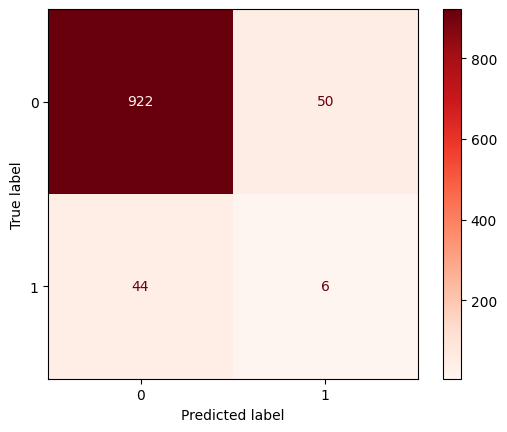

In [39]:
# Random Forest Model Evaluation
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap = 'Reds'))

In [40]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(accuracy)

0.9080234833659491


## Cross validate


In [41]:
cv_dt = cross_validate(dt, X_train_balanced, y_train_balanced, cv=5, scoring=['accuracy', 'recall', 'f1'])
cv_rf = cross_validate(rf, X_train_balanced, y_train_balanced, cv=5, scoring=['accuracy', 'recall', 'f1'])
print(cv_dt)
print(cv_rf)

{'fit_time': array([0.02904177, 0.02400875, 0.02531624, 0.02082992, 0.02873659]), 'score_time': array([0.00683761, 0.00824976, 0.00697756, 0.00713801, 0.00615335]), 'test_accuracy': array([0.9003856 , 0.93890675, 0.93118971, 0.93890675, 0.93890675]), 'test_recall': array([0.85347044, 0.97039897, 0.96911197, 0.96658098, 0.96915167]), 'test_f1': array([0.89548213, 0.94073612, 0.93366398, 0.94058787, 0.94073612])}
{'fit_time': array([0.51720166, 0.59055638, 0.61881304, 0.63968372, 0.42318296]), 'score_time': array([0.03477907, 0.03682947, 0.04077363, 0.03611708, 0.02860284]), 'test_accuracy': array([0.90938303, 0.96913183, 0.96848875, 0.95948553, 0.96141479]), 'test_recall': array([0.85604113, 0.99099099, 0.98712999, 0.98971722, 0.98843188]), 'test_f1': array([0.90427699, 0.9697733 , 0.96904611, 0.96069869, 0.96245307])}


# Hyperparameter Tuning

## Random Search

In [42]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num = 8)]
max_depth = [int(x) for x in np.linspace(10, 1000, 8)]
min_samples_split = [2, 5, 10, 14,17,22,26]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 14, 16]
params_rf = {'n_estimators': n_estimators,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [43]:
# Train with Random Search
rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=params_rf,
                                 n_iter=10,
                                 cv=5,
                                 random_state = 27,
                                 n_jobs=-1, #parallel processing
                                 scoring='f1',
                                 verbose=3)
rf_randomcv.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 151, 292, 434, 575,
                                                      717, 858, 1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             14, 16],
                                        'min_samples_split': [2, 5, 10, 14, 17,
                                                              22, 26],
                                        'n_estimators': [100, 371, 642, 914,
                                                         1185, 1457, 1728,
                                                         2000]},
                   random_state=27, scoring='f1', verbose=3)

In [44]:
# Get Best Hyperparameters
rf_randomcv.best_params_

{'n_estimators': 642,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 292}

In [45]:
rf_randomcv_tuned = rf_randomcv.best_estimator_

In [46]:
rf_randomcv_tuned

RandomForestClassifier(max_depth=292, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=642)

F1 Score - Test Set   :  0.1643835616438356 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       972
           1       0.12      0.24      0.16        50

    accuracy                           0.88      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.92      0.88      0.90      1022
 

Confusion Matrix      : 


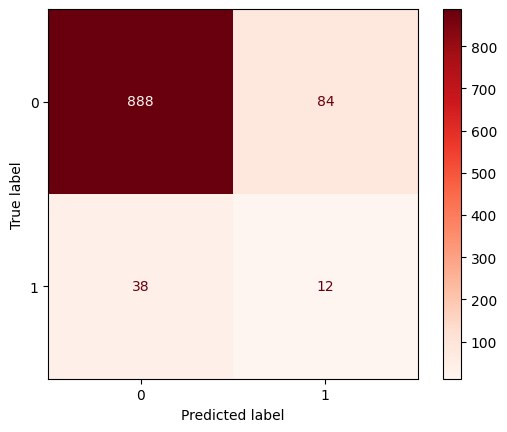

In [47]:
# Performance checking of RF model on Test-Set

y_pred_rf_tuned = rf_randomcv_tuned.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_rf_tuned), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_rf_tuned), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_tuned, X_test, y_test, cmap='Reds'))

## Grid Search


In [48]:
n_estimators = [1,10,100,150]
max_depth = [int(x) for x in np.linspace(10, 300,5)]
criterion = ['gini','entropy','log_loss']
min_samples_leaf = [1, 2, 4, 6, 15]

params_rf_grid = {'n_estimators': n_estimators,
             'max_depth':max_depth,
             'criterion':criterion,
             'min_samples_leaf':min_samples_leaf}

# Initialization GridSearchCV
rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=params_rf_grid,
                         cv=3,
                         scoring='f1',
                         n_jobs=-1,  # parallel processing
                         verbose=3)

# Perform grid search on balanced data
rf_gridcv.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 82, 155, 227, 300],
                         'min_samples_leaf': [1, 2, 4, 6, 15],
                         'n_estimators': [1, 10, 100, 150]},
             scoring='f1', verbose=3)

In [49]:
# Get Best Hyperparameters
rf_gridcv.best_params_

{'criterion': 'log_loss',
 'max_depth': 300,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [50]:
rf_gridcv_tuned = rf_gridcv.best_estimator_

F1 Score - Test Set   :  0.1142857142857143 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.11      0.12      0.11        50

    accuracy                           0.91      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.91      0.91      0.91      1022
 

Confusion Matrix      : 


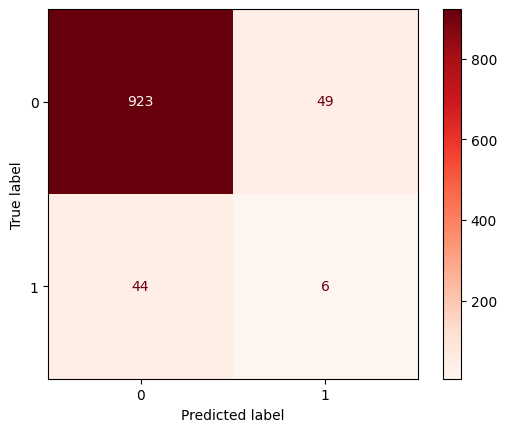

In [51]:
# Checking Performance of Model RF on Test-Set

y_pred_rf_tuned = rf_gridcv_tuned.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_rf_tuned), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_rf_tuned), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_tuned, X_test, y_test, cmap='Reds'))

# Model Saving



In [52]:
import joblib

# Save the best model from GridSearchCV to file
joblib.dump(rf_gridcv_tuned, 'random_forest_model.pkl')


['random_forest_model.pkl']

# Conclusion

- Model Results:
  From the statistics above, it is clear that this model is more specific than sensitive. Negative cases are predicted more accurately than positive cases. This indicates that the variables present in the current data better describe the likelihood of someone not experiencing a stroke, supported by the very low correlation between feature variables and stroke.

- Future Developments:
  New data variables are needed to better predict positive stroke cases and reduce the negative impact of diagnostic errors.

  In addition to incorporating new data variables, future development can involve the exploration and utilization of other advanced algorithms such as Gradient Boosting Machines (GBM) or Extreme Gradient Boosting (XGBoost). These algorithms are known for their effectiveness in handling complex datasets and may provide improved performance in predicting stroke cases. Additionally, ensemble techniques such as stacking or blending could be explored to combine the strengths of multiple models for even better predictive accuracy.